In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

import numpy as np

print(tf.__version__)

2.3.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print()
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)


x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print('train max = ', x_train[0].max(), ', train min = ', x_train[0].min())
print('test max = ', x_train[0].max(), ', test min = ', x_train[0].min())

train max =  1.0 , train min =  0.0
test max =  1.0 , test min =  0.0


In [4]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

print('train label = ', t_train[0], ', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', demical value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , demical value =  7


In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))

model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [6]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.1), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x_train, t_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.8697 - val_loss: 0.2847 - val_accuracy: 0.9173
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.9238 - val_loss: 0.2278 - val_accuracy: 0.9367
Epoch 3/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.9393 - val_loss: 0.1952 - val_accuracy: 0.9443
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1822 - accuracy: 0.9479 - val_loss: 0.1715 - val_accuracy: 0.9521
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9548 - val_loss: 0.1499 - val_accuracy: 0.9579
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1391 - accuracy: 0.9606 - val_loss: 0.1400 - val_accuracy: 0.9608
Epoch 7/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1244 - accuracy: 0.9649 - val_loss: 0.1301 - val_accuracy: 0.9627
Epoch 

In [8]:
model.evaluate(x_test, t_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9764


[0.07851167768239975, 0.9764000177383423]

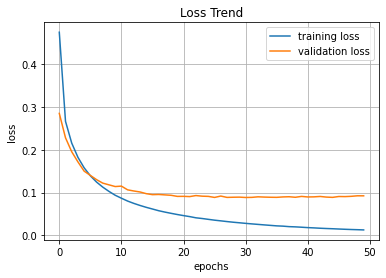

In [10]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

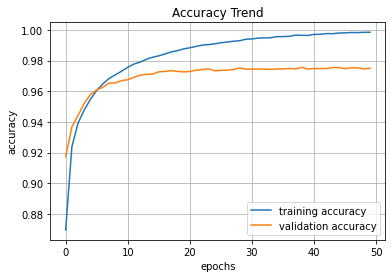

In [11]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()